# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
import math
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    plt.axis('off')
    if title: plt.title(title)
    plt.show()


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

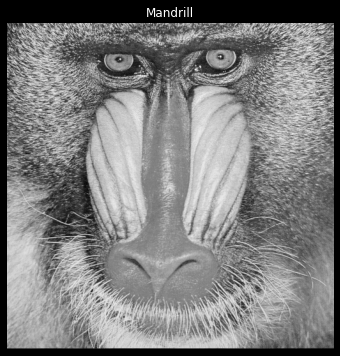

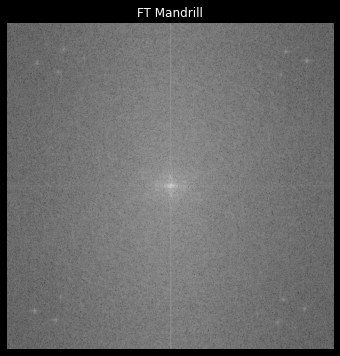

In [2]:
mandrill = np.array(Image.open("img/mandrill.png"))
imshow(mandrill,"Mandrill")
imshow(np.log(1+np.abs(fftshift(fft2(mandrill)))),"FT Mandrill")

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [3]:
# def idealLowPassFilter(n, m, fc):
#     res = np.zeros((n,m))
#     for i in range(res.shape[0]):
#         for j in range(res.shape[1]):
#             if(((i-(n//2)) ** 2 + (j-(m//2)) ** 2) < fc**2):
#                 res[i,j] = 1
#     return res

def idealLowPassFilter(n, m, fc):
    """ Ideal low pass filter """ 
    H = np.array([ 1 if (((i-(n//2)) ** 2 + (j-(m//2)) ** 2) < fc**2) else 0 for i in range(n) for j in range(m)]).reshape(n,m)
    return H

print(idealLowPassFilter(5,5,2),"\n")
print(idealLowPassFilter(5,5,1.2))

#Interpretation
#notre fonction crée une matrice de la taille requise et va nous permettre de filter les basses
#fréquences. En effet, les zones avec 0 seront alors nulle et les zone avec 1 conserverons 
#leur valeur. Pour en faire un filtre passe hautn le principe est le même mais on inverse les zones.

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]] 

[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [4]:
def lowPass(I, fc):
    n, m = I.shape
    FTI = fftshift(fft2(I))
    idealFilter = idealLowPassFilter(n,m,fc)
    tmp = FTI*idealFilter
    return np.real(ifft2(fftshift(tmp)))

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


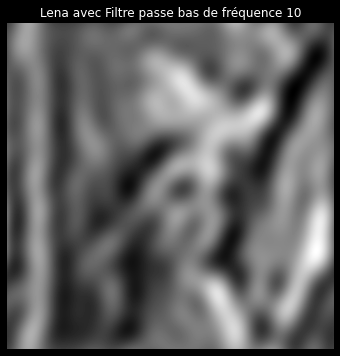

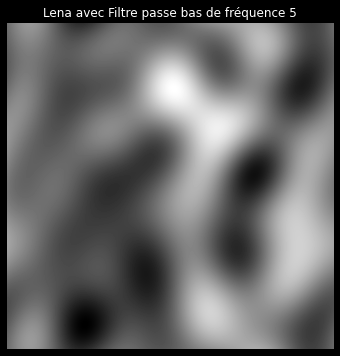

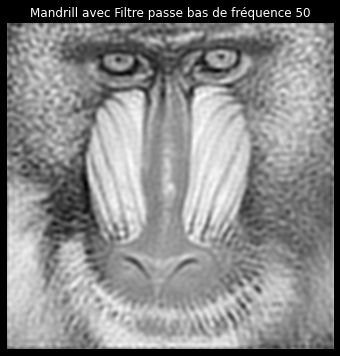

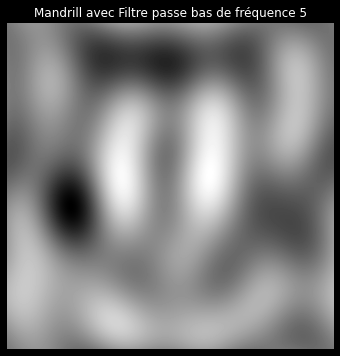

In [5]:
lena = np.array(Image.open("img/lena.jpg"))
imshow(lowPass(lena,10),"Lena avec Filtre passe bas de fréquence 10")
imshow(lowPass(lena,5),"Lena avec Filtre passe bas de fréquence 5")
imshow(lowPass(mandrill,50),"Mandrill avec Filtre passe bas de fréquence 50")
imshow(lowPass(mandrill,5),"Mandrill avec Filtre passe bas de fréquence 5")

#Interpretation
#Lorsque notre fréquence diminue, le filtre lui retire de plus en plus de fréquence du spectre de 
#l'image ce qui s'observe sur les comparaisons des images. L'image est plus "lisse", plus uniforme 
#sur l'ensemble de l'image. On peux utiliser ce filtre pour rendre un image plus "lisse" ce qui
#peux etre utiliser dans l'observation microscopique.

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

(d/2)-1

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

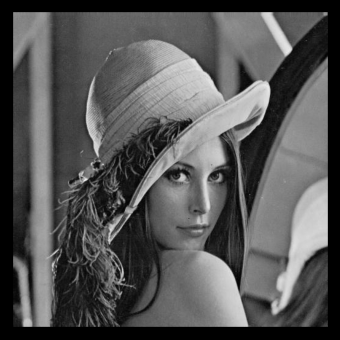

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 136. 138. ... 125.  98.   0.]
 [  0. 137. 138. ... 131. 104.   0.]
 ...
 [  0.  20.  24. ...  72.  76.   0.]
 [  0.  19.  25. ...  67.  76.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [6]:
# def imagePad(I,h):
#     assert(h%2 == 1)
#     n,m = I.shape
#     res = np.zeros((n+ h - 1, m + h - 1))
#     for i in range((h//2),(h//2) + I.shape[0]):
#         for j in range((h//2),(h//2) + I.shape[1]):
#             res[i,j] = I[i-(h//2),j-(h//2)]
#     return res

def imagePad(I, kernel_size):
    """ pad an image with zeros """
    assert(kernel_size%2 == 1)
    n, m = I.shape
    imagePad = I.copy()
    k = kernel_size//2
    # pad the image with zeros

    # top
    imagePad = np.concatenate((np.zeros((n,k)),imagePad),axis=1)
    # bottom
    imagePad = np.concatenate((imagePad,np.zeros((n,k))),axis=1)
    # left
    imagePad = np.concatenate((np.zeros((k,m+2*k)),imagePad),axis=0)
    # right
    imagePad = np.concatenate((imagePad,np.zeros((k,m+2*k))),axis=0)  

    return imagePad

imshow(imagePad(lena,21))
print(imagePad(lena,3))

#Interpretation
#la fonction crée une nouvelle image, une copie de l'image passer en argument et ajoute une bordure
#noire en fonction de la taille du kernel qui est demander ( ici pour l'ilustration visuel on 
# applique un kernel de taille 21*21 donc une bordure de 10 pixels autour de l'image ).

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [7]:
def conv2(I, h):
    taille_kernel = h.shape[0]
    k = taille_kernel // 2
    imPad = imagePad(I, taille_kernel)
    n, m = I.shape
    res = np.array([np.sum(imPad[i-k:i+k+1,j-k:j+k+1]*h)//taille_kernel for i in range(k,n+k) for j in range(k,m+k)]).reshape(n,m)
    return res

# def conv2(I, h):
#     taille_kernel = h.shape[0]
#     k = taille_kernel // 2
#     imPad = imagePad(I, taille_kernel)
#     n, m = I.shape
#     res = np.zeros((n, m))
#     for i in range(k, n + k):
#         for j in range(k, m + k):
#             imPadCenter = imPad[(i - k):(1 + i + k), (j - k):(1 + j + k)]
#             res[i - k, j - k] = np.sum(imPadCenter * h) // taille_kernel
#     return res
            

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

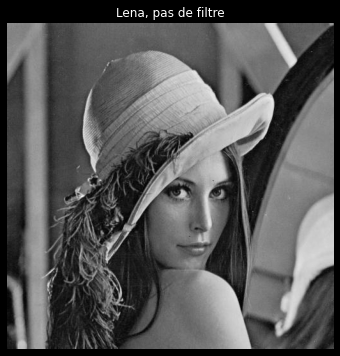

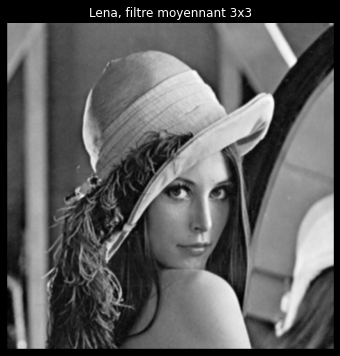

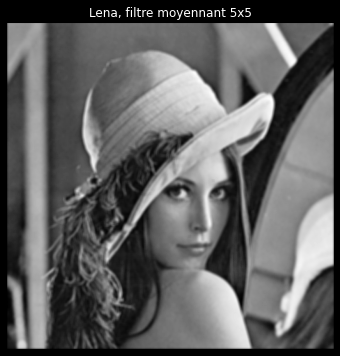

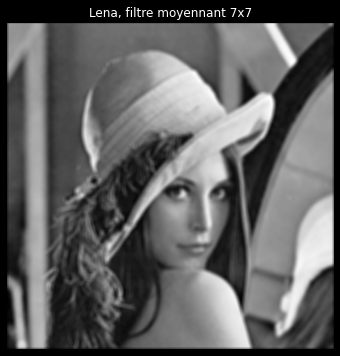

In [8]:
imshow(lena,"Lena, pas de filtre")
imshow(conv2(lena,np.ones((3,3))),"Lena, filtre moyennant 3x3")
imshow(conv2(lena,np.ones((5,5))),"Lena, filtre moyennant 5x5")
imshow(conv2(lena,np.ones((7,7))),"Lena, filtre moyennant 7x7")

#Interpretation 
#Notre filtre ici est un filtre moyennant la valeur des pixels avec leur entourage/voisinage plus ou 
#moins proche selon la taille du kernel. Cela aura pour effet d'uniformiser chaque pixel avec la 
#valeur moyenne des pixel a proximiter si le kernel est petit. Mais plus la taille du kernel est 
#importante, plus l'image sera "homogénéiser" donnant cette effet de plus en plus "brumeux".

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

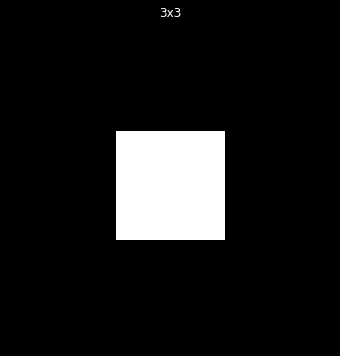

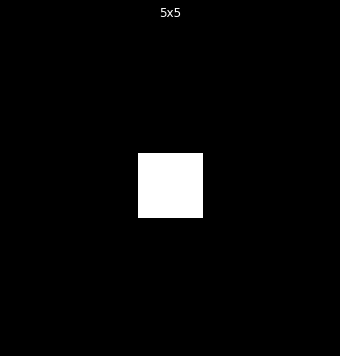

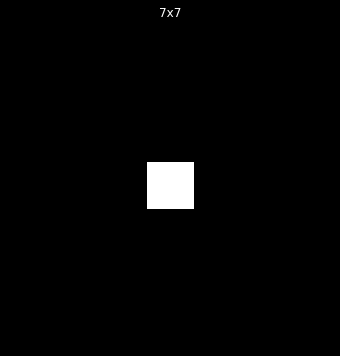

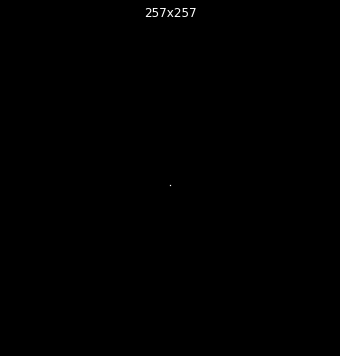

In [9]:
def toVisualizeLogFT(If):
    ft_log = np.log(1+np.abs(np.copy(If)))
    return ft_log


imshow(toVisualizeLogFT(fftshift(fft2(np.ones((3,3))))),"3x3")
imshow(toVisualizeLogFT(fftshift(fft2(np.ones((5,5))))),"5x5")
imshow(toVisualizeLogFT(fftshift(fft2(np.ones((7,7))))),"7x7")
imshow(toVisualizeLogFT(fftshift(fft2(np.ones((257,257))))),"257x257")


6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

**On peux voir que les spectres des filtres nous indique qu'ils sont des filtre passe bas. En effet, plus la taille du filtre moyennant est petite, plus le spectre filtré bas. On le vois sur le dernier spectre, seul les fréquences extrêmement haute seront conservé ici.**

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

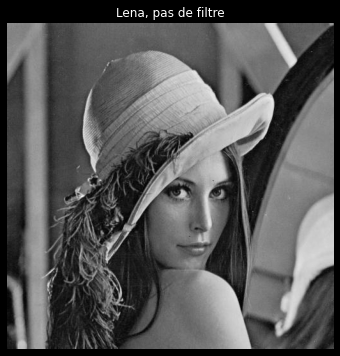

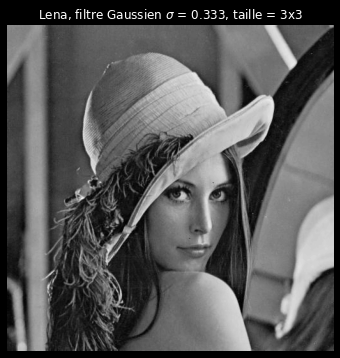

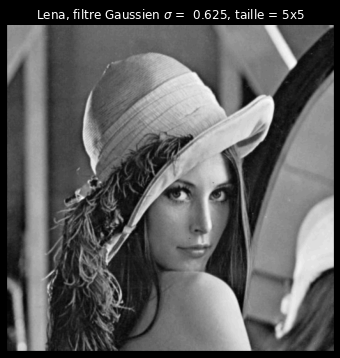

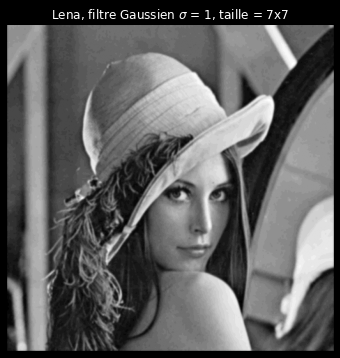

filtre Gaussien $\sigma$ = 0.333 taille :  (3, 3)
filtre Gaussien $\sigma$ = 0.625 taille :  (5, 5)
filtre Gaussien $\sigma$ = 1. taille :  (7, 7)


In [10]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.array(np.ceil(3*sigma)).astype(int)
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below

imshow(lena,"Lena, pas de filtre")
imshow(conv2(lena,gaussianKernel(0.333)),"Lena, filtre Gaussien $\sigma$ = 0.333, taille = 3x3")
imshow(conv2(lena,gaussianKernel(0.625)),"Lena, filtre Gaussien $\sigma$ =  0.625, taille = 5x5")
imshow(conv2(lena,gaussianKernel(1.)),"Lena, filtre Gaussien $\sigma$ = 1, taille = 7x7")

#check des tailles
print("filtre Gaussien $\sigma$ = 0.333 taille : ",gaussianKernel(0.333).shape)
print("filtre Gaussien $\sigma$ = 0.625 taille : ",gaussianKernel(0.625).shape)
print("filtre Gaussien $\sigma$ = 1. taille : ",gaussianKernel(1.).shape)

#Interpretation 
#Filter width (and height): 2*entier_superieur(3σ) + 1 = taille kernel
#Grâce a la formule ci-dessus, on cherche a obtenir σ pour une taille de 3, 5 et 7
#Les effets de ce filtre sont plus visible sur les surfaces uniforme tel que l'arrière plan de 
#notre image, on y vois des zones éparse de pixel unifié en pack.

## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

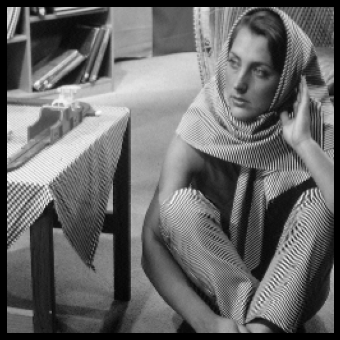

In [11]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]
barbara = np.array(Image.open("img/barbara.png"))
imshow(subSample2(barbara))

#Interpretation 
#comme vus dans le TME3, la réduction de la résolution produit un effet d'aliasing du aux basse
#fréquences de notre image.

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


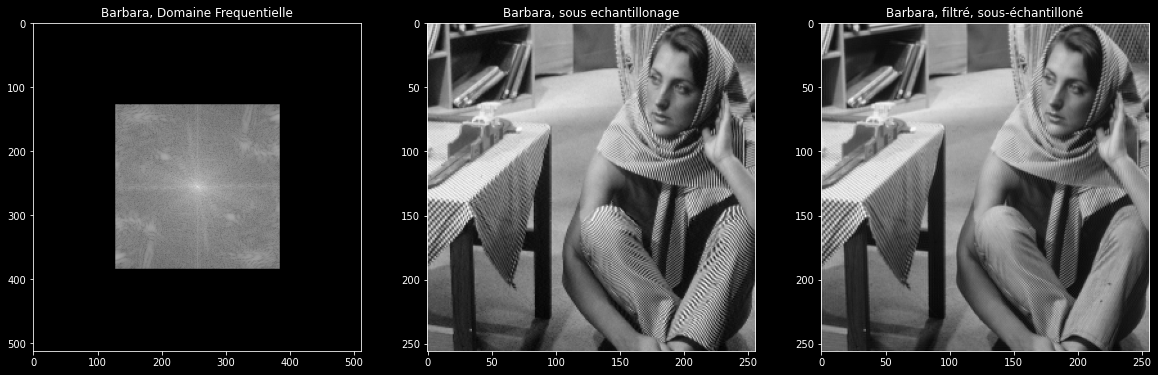

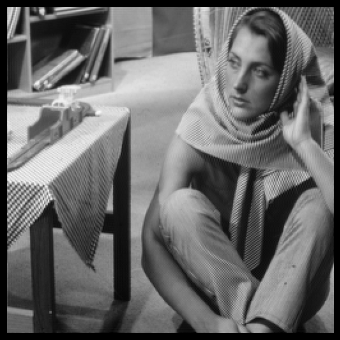

In [24]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A

AAF = antiAliasingFilter(barbara.shape[0], barbara.shape[1])
print(AAF)
barbara_filt = fftshift(fft2(barbara)) * AAF

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(toVisualizeLogFT(barbara_filt))
ax[0].set(title="Barbara, Domaine Frequentielle")
ax[1].imshow(subSample2(barbara))
ax[1].set(title="Barbara, sous-echantilloné")
ax[2].imshow(subSample2(np.real(ifft2(fftshift(barbara_filt)))))
ax[2].set(title="Barbara, filtré, sous-échantilloné")
plt.show()

### your answer start below
# Comme observer dans l'exercice 1 de ce TME, le principe de filter dans le dommaine de fréquence
# consiste à récuperer le spectre de l'image grâce à la Transformée de Fourier puis de lui appliquer
# un filter en effectuant le produit du spectre et de notre filtre. Puis, on effectue la TF inverse 
# et on ne récupère que la partie réel.

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

Dans l'image de Barbara sans filtre d'aliasing, On constate cette effet d'aliasing sur les zones de de basse fréquence, les zone de rayures, damier et les contours dans notre cas tout particulièrement en son le meilleur exemple. Puis dans l'image avec un filtre anti aliasing ( filtre passe bas ) cette effet d'aliasing est très nettement moins visible mais dans les deux cas nous avons perdu de l'information dans nos zones de basse fréquence.

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

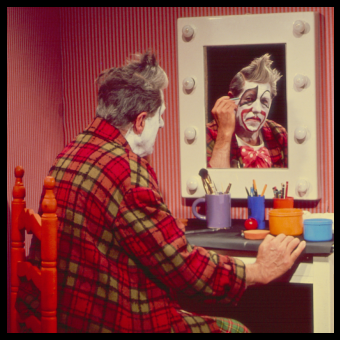

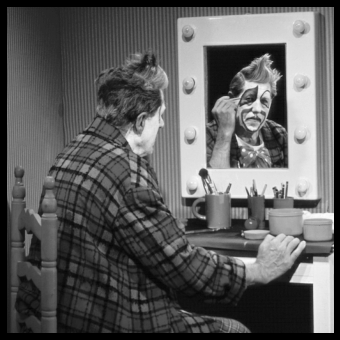

In [13]:
I1 = np.array(Image.open("img/clown.bmp"))
I2 = np.array(Image.open("img/clown_lumi.bmp"))
imshow(I1)
imshow(I2)

#Interprétation
# les deux images représenter la même choses mais l'une des deux possèdes une dimension suplémentaire
# afin de représenter des couleurs. I1 est donc de dimension (512, 512, 3) et (512, 512) pour I2. 
# Le 3 s'explique par les 3 couleurs primaire : le rouge, le bleu, le vert. Ici, leur intensitée 
# est exprimée par un valeur de 0 a 255. 

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

IR : Rouge


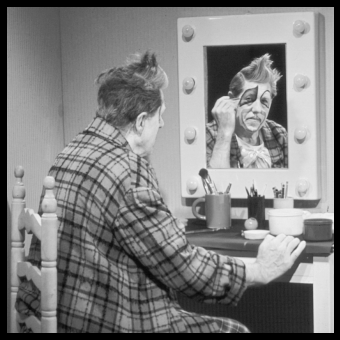

IG : Vert


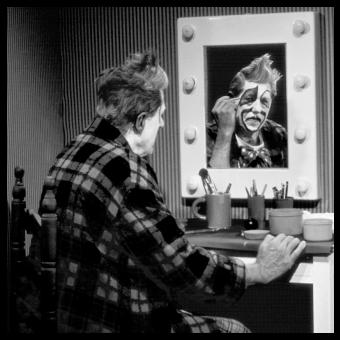

IB : Bleu


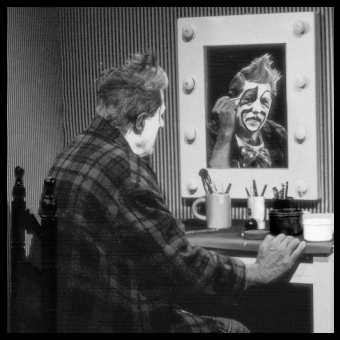

In [14]:
IR = I1[:, :, 0]
IG = I1[:, :, 1]
IB = I1[:, :, 2]
print("IR : Rouge")
imshow(IR)
print("IG : Vert")
imshow(IG)
print("IB : Bleu")
imshow(IB)

#Interpretation
# L'explication des 3 dimensions ce trouve dans la réponse précedente. Après avoir extrait l'intensitée
# de chaque couleur on peu voir en les affichants les zones dans lequels chaque couleurs est 
# plus ou moins intense. Plus on tend vers le noir moins la couleur est présente sur cette partie.

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

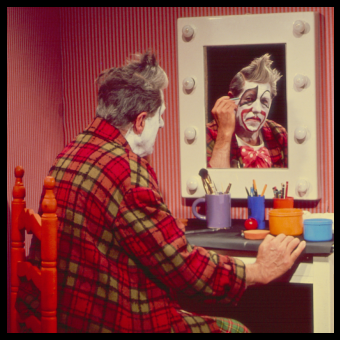

In [26]:
I3 = np.zeros((512, 512, 3))
I3[:, :, 0] = IR
I3[:, :, 1] = IG
I3[:, :, 2] = IB
I3 = I3.astype(np.uint8)
imshow(I3)


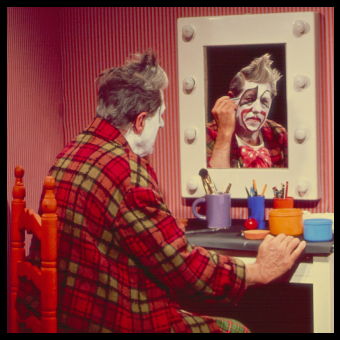

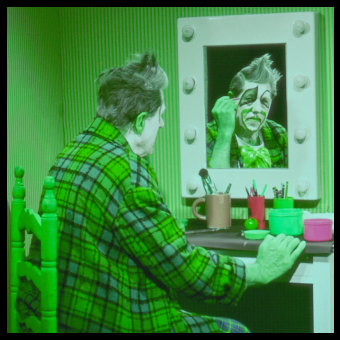

In [29]:
# I3 = np.zeros((I1.shape))
# for i in range(I3.shape[0]):
#     for j in range(I3.shape[1]):
#         I3[i, j] = [int(IR[i, j]), int(IG[i, j]), int(IB[i, j])]
        
# I3 = I3.astype(int)
# imshow(I3)

I3 = np.zeros(I1.shape)
I3[:, :, 0] = IR/255
I3[:, :, 1] = IG/255
I3[:, :, 2] = IB/255
imshow(I3)

I3_recombined = np.zeros((I1.shape))
# for i in range(I3_recombined.shape[0]):
#     for j in range(I3_recombined.shape[1]):
#         I3_recombined[i, j] = [int(IB[i, j])/255, int(IR[i, j])/255, int(IG[i, j])/255]

I3_recombined[:, :, 0] = IB/255
I3_recombined[:, :, 1] = IR/255
I3_recombined[:, :, 2] = IG/255
        
imshow(I3_recombined)

#Interprétations
# avec I3 nous avons recrée notre image originel, ce qui semble logique puisque nous avons extrait 
# chaque intensité des 3 pigments primaire et nous les avons recombinées. Mais en les recombinant dans
# différents ordres, les couleurs de l'image sont modifier sans l'altérer. Cela est du au fait que 
# la midification le l'arrangement des couleurs à échanger l'intensité des couleurs, dans notre 
# exemple, le vert a été echanger avec le rouge.

4. Write a code that allows to see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

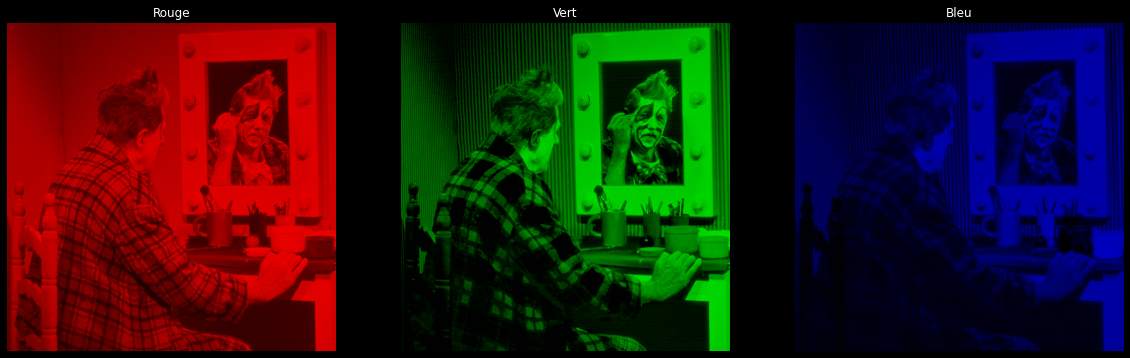

In [31]:
def colorScales(I):
    SR = np.zeros((I.shape))
    SG = np.zeros((I.shape))
    SB = np.zeros((I.shape))
    
    # for i in range(I.shape[0]):
    #     for j in range(I.shape[1]):
    #         SR[i, j, 0] = I[i, j, 0]/255
    #         SG[i, j, 1] = I[i, j, 1]/255
    #         SB[i, j, 2] = I[i, j, 2]/255

    SR[:, :, 0] = I[:, :, 0]/255
    SG[:, :, 1] = I[:, :, 1]/255
    SB[:, :, 2] = I[:, :, 2]/255

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(SR)
    plt.title("Rouge")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(SG)
    plt.title("Vert")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(SB)
    plt.title("Bleu")
    plt.axis('off')

    plt.show()


colorScales(I1)

#Interprétations
# en observant le spectre décomposé de notre image on peux voir l'intensité de chaque et comment 
# chaque couleur primare est répartie sur cette dernière. En effet, les parties noires sur l'image
# de base le sont toujours sur les spectres de couleurs unique et on observe également que plus 
# le spectre est sombre, moins la couleur d spectre est utiliser dans l'image de base. On le 
# constate avec la couleur rouge nettement plus présente que la couleur bleu.